[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1KgzxozmCWUwptvRFJbPWT1N1wSjPib6X?usp=sharing)


# **GEOG279 - Fall 2025**
# **Assignment 1: Impact Assessment Using VDSA Data: Intro to Randomized Control Trials (RCT) Analysis**
### **Instructor**: Kathy Baylis

<!-- This content will not be shown -->

# **Getting Started**

<table style="border: 1px solid #4CAF50; background-color: #f9f9f9; padding: 10px; width: 100%;">
  <tr>
    <td><h2>
      1. Run the code cell below. <br>
      2. When prompted, enter your name. <br>
      3. The current date and your name will be automatically displayed in a formatted text.<br>
    </td></h2>
  </tr>
</table>








In [ ]:
# @title **Click to Enter your Name** {"vertical-output":true}

from datetime import datetime
from IPython.display import display, Markdown

# Prompt user to input their name
author_name = input("Please enter your name: ")

# Get the current date
current_date = datetime.now().strftime("%Y-%m-%d")

# Create markdown content
markdown_content = f"**Author**: {author_name}\n<br>**Date**: {current_date}</br>"

# Display the markdown content
display(Markdown(markdown_content))

Please enter your name: Crystal


**Author**: Crystal
<br>**Date**: 2025-10-13</br>

<table style="border: 1px solid #4CAF50; background-color: #f9f9f9; padding: 10px; width: 100%;">
  <tr>
    <td><h2 style="margin: 0;"><b>Important</b>: Run the below cell in order to activate <code>R</code> in this notebook.</h2></td>
  </tr>
</table>

In [2]:
# activate R magic
%load_ext rpy2.ipython

## **Cloning Github Repo**
This step is essential in order to have access to the data that you'll use for this assignment.

In [3]:
# WARNING: Do not modify this code. Execute as is.
import os
import subprocess

# Define repository details
repo_name = 'GEOG279-Course'
repo_url = 'https://github.com/GEOG279-Advanced-Spatial-Statistics/GEOG279-Course.git'

# Check if the repository is already cloned
repo_path = os.path.join(os.getcwd(), repo_name)
if not os.path.exists(repo_path):
    # Construct the command to clone the repository
    cmd_string = f'git clone {repo_url}'

    try:
        # Execute the command to clone the repository
        subprocess.run(cmd_string, shell=True, check=True)
        print(f"Repository cloned successfully at: {repo_path}")
    except subprocess.CalledProcessError as e:
        print(f"Error occurred while cloning the repository: {e}")
else:
    print(f"Repository already exists at: {repo_path}")

Repository cloned successfully at: /content/GEOG279-Course


# **Introduction**


In this first assignment, you'll work with real-world data to apply the techniques covered during lecture. We'll be using the **Village Dynamics of South Asia (VDSA)** panel data set collected by the International Crops Research Institute for the Semi-Arid Tropics ([ICRISAT](https://dataverse.icrisat.org/dataset.xhtml?persistentId=doi:10.21421/D2/HDEUKU))(GV and Falk). This dataset provides detailed, high-frequency agricultural production data at the parcel level from households in India.

For the data exercises concerning Randomized Control trials (RCTs) we will use data from a real RCT on the effects of marketing in encouraging households to purchase index insurance. This RCT was conducted in conjunction with ICRISAT, again in India.

For exercises related to Randomized Control Trials (RCTs), we will analyze data from an RCT that evaluated the impact of marketing efforts on households’ decisions to purchase index insurance. This trial was also conducted in collaboration with ICRISAT in India.

To begin, we will clean and prepare the `raw` VDSA data for analysis. This process is crucial for two reasons.
* First, it will allow you to (re)familiarize yourself with `R`.
* Second, it will ensure that the dataset is “regression-ready” for later exercises/assignments.

**Objectives:**

1.	Get familiar with R and the VDSA dataset.
2.	Prepare the data for analysis in upcoming sessions.
3.	Use the dataset to explore how confounding factors influence impact assessments.


*Citation:*
GV, Anupama, and Thomas Falk. Data on Primary Survey Study on Agricultural Productivity and Plot Size: Village Dynamics in South Asia (VDSA). 4, ICRISAT. ICRISAT Dataverse, https://doi.org/10.21421/D2/HDEUKU.



# **Exploratory Data Analysis (EDA)**

## **Loading Libraries (should take under 10 mins)**

For this assignment, you'll need the following libraries:

1.	`haven`: Allows importing and exporting data from statistical software formats like Stata, SPSS, and SAS into R, preserving variable labels and attributes.
3.	`tidyverse`: A collection of R packages for data manipulation, cleaning, visualization, and analysis, including tools like dplyr, tidyr, and ggplot2.
4.	`ggpubr`: An extension of ggplot2 that simplifies creating publication-ready plots with added statistical annotations and easy layout arrangements.
**Note**: Loading the libraries may take a couple of minutes.


In [51]:
%%R

# this code chunk will take about a minute on Google Colab
#install.packages(c("haven","tidyverse","ggpubr","dagitty","ggdag"))
install.packages(c("dagitty", "ggdag", "ggplot2"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/dagitty_0.3-4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/ggdag_0.2.13.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_4.0.0.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpuFNCuG/downloaded_packages’


In [52]:
%%R
# Loading libraries
library(haven)
library(tidyverse)
#library(ggpubr)
library(dagitty)
library(ggdag)
library(ggplot2)

The function `install.packages()` downloads and installs a package from the internet. The `library()` function loads that particular package into the current session.

Packages are a very important part of `R`. The basic default installation already provides some limited functionality. But the real power of `R` lies in the large community of independent developers who are constantly implementing new packages to the language.



## **Loading the data**

In [6]:
#%%capture
%%R

# Define the path to the .dta file in Google Drive
data_url <- "/content/GEOG279-Course/assignment_1/data/VDSA_Prod_Data.dta"

# Read the .dta file using haven
df <- read_dta(data_url)

# Display the first few rows to confirm successful reading
head(df)

# A tibble: 6 × 30
  country   vil_id  rain average    dev   pop  dist nomkt vdsa_hh_id tot_acre
  <dbl+lbl>  <dbl> <dbl>   <dbl>  <dbl> <dbl> <dbl> <dbl>      <dbl>    <dbl>
1 1 [India]    135   NA      NA  NA       876    12     2     135008    0    
2 1 [India]    119   NA      NA  NA      3600     5     4     119035    1.22 
3 1 [India]    135   NA      NA  NA       876    12     2     135203    0    
4 1 [India]    119  496.    577.  0.859  3600     5     4     119034    0.870
5 1 [India]    119  471.    577.  0.815  3600     5     4     119034    1.15 
6 1 [India]    120  471.    577.  0.815  4494    15     4     120048    1.80 
# ℹ 20 more variables: genderH <dbl>, ageH <dbl>, noadultM <dbl>,
#   noadultF <dbl>, nokids <dbl>, sizehh <dbl>, farm_cat <chr>, aindex <dbl>,
#   lindex <dbl>, prcl_id <dbl>, sur_yr <dbl>, plot_area <dbl>, output <dbl>,
#   price <dbl>, value <dbl>, lab_q <dbl>, fert_q <dbl>, irr_q <dbl>,
#   mech_v <dbl>, pest_v <dbl>


**You can use any of the three functions below to inspect the dataset.**

**1. The `str()` function**
The `str()` function provides a compact summary of the data frame, including
data types for each column.

In [7]:
%%R
# Check data types of all columns in the data frame
str(df[1:5])

tibble [1,536 × 5] (S3: tbl_df/tbl/data.frame)
 $ country: dbl+lbl [1:1536] 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
   ..@ label       : chr "country"
   ..@ format.stata: chr "%10.0g"
   ..@ labels      : Named num [1:2] 0 1
   .. ..- attr(*, "names")= chr [1:2] "Bangladesh" "India"
 $ vil_id : num [1:1536] 135 119 135 119 119 120 119 137 119 118 ...
  ..- attr(*, "label")= chr "unique village ID"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ rain   : num [1:1536] NA NA NA 496 471 ...
  ..- attr(*, "label")= chr "rainfall in sur_yr"
  ..- attr(*, "format.stata")= chr "%10.0g"
 $ average: num [1:1536] NA NA NA 577 577 ...
  ..- attr(*, "label")= chr "average rainfall from 1981-2014"
  ..- attr(*, "format.stata")= chr "%10.0g"
 $ dev    : num [1:1536] NA NA NA 0.859 0.815 ...
  ..- attr(*, "label")= chr "deviation of rainfall from mean"
  ..- attr(*, "format.stata")= chr "%10.0g"


**2. `sapply()` with `class()`**

If you want a simple list of column names and their types, you can use sapply() along with the class() function.

In [8]:
%%R
# Check data types of all columns in the data frame
sapply(df[1:5], class)

$country
[1] "haven_labelled" "vctrs_vctr"     "double"        

$vil_id
[1] "numeric"

$rain
[1] "numeric"

$average
[1] "numeric"

$dev
[1] "numeric"



**3. `dplyr::glimpse`**

The `glimpse()` function from the `dplyr` package provides an overview of the data frame, showing column names, data types, and a preview of the values.

In [9]:
%%R
glimpse(df)

Rows: 1,536
Columns: 30
$ country    <dbl+lbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ vil_id     <dbl> 135, 119, 135, 119, 119, 120, 119, 137, 119, 118, 134, 119,…
$ rain       <dbl> NA, NA, NA, 495.6600, 470.7660, 470.7660, 495.6600, NA, NA,…
$ average    <dbl> NA, NA, NA, 577.3553, 577.3553, 577.3553, 577.3553, NA, NA,…
$ dev        <dbl> NA, NA, NA, 0.8585009, 0.8153836, 0.8153836, 0.8585009, NA,…
$ pop        <dbl> 876, 3600, 876, 3600, 3600, 4494, 3600, 880, 3600, 3000, 14…
$ dist       <dbl> 12.0, 5.0, 12.0, 5.0, 5.0, 15.0, 5.0, 13.0, 5.0, 4.5, 9.0, …
$ nomkt      <dbl> 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 1, 4, 4, 4, 4, 2, 4, 2, 2, 4,…
$ vdsa_hh_id <dbl> 135008, 119035, 135203, 119034, 119034, 120048, 119034, 137…
$ tot_acre   <dbl> 0.00, 1.22, 0.00, 0.87, 1.15, 1.80, 0.87, 5.00, 1.07, 1.10,…
$ genderH    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ ageH       <dbl> 43, 62, 48, 56, 55, 63, 56, 48, 52, 77, 58, 62, 60, 77, 62,…
$ noadultM   <db

**Which one to use ?**
* Use `str()` for a quick, detailed structure of the data frame, including data types and sample values.
* Use `sapply()` with `class()` if you need a simple list of column data types.
* Use `glimpse()` for a tidy, detailed overview, especially if you’re using the `dplyr` package.


# **Summary Statistics & Variables Overview**
To get an overview of the dataset, use the `summary()` function. This function provides basic summary statistics for each variable, including the mean, quartiles, and the number of missing observations. When applied to an entire data frame, `summary()` calculates these statistics for all variables. For example:


In [10]:
%%R
# Display summary statistics of the dataset
summary(df)


    country      vil_id           rain           average           dev        
 Min.   :1   Min.   :113.0   Min.   : 363.7   Min.   :500.7   Min.   :0.6681  
 1st Qu.:1   1st Qu.:118.0   1st Qu.: 363.7   1st Qu.:500.7   1st Qu.:0.7263  
 Median :1   Median :123.0   Median : 464.9   Median :500.7   Median :0.8154  
 Mean   :1   Mean   :126.2   Mean   : 511.8   Mean   :570.4   Mean   :0.8735  
 3rd Qu.:1   3rd Qu.:135.0   3rd Qu.: 470.8   3rd Qu.:577.4   3rd Qu.:0.9285  
 Max.   :1   Max.   :138.0   Max.   :1089.6   Max.   :913.8   Max.   :1.3682  
                             NA's   :1061     NA's   :1061    NA's   :1061    
      pop            dist            nomkt         vdsa_hh_id    
 Min.   : 573   Min.   : 0.000   Min.   :0.000   Min.   :113241  
 1st Qu.:1410   1st Qu.: 4.500   1st Qu.:1.000   1st Qu.:118055  
 Median :3000   Median : 9.000   Median :2.000   Median :123034  
 Mean   :2865   Mean   : 8.889   Mean   :2.596   Mean   :126310  
 3rd Qu.:3600   3rd Qu.:13.000   3rd Q

In [11]:
%%R

# View a specific variable
summary(df$rain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  363.7   363.7   464.9   511.8   470.8  1089.6    1061 


If you are interested in viewing summary statistics for a subset of observations rather than the entire dataset, you can do this in several ways in `R`. One option is to use the `by()` function. For example, to get the summary statistics of the output variable grouped by the gender of the head of household, you can use:

In [12]:
%%R
by(df$output,df$genderH,FUN=summary)

df$genderH: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   50.0   130.0   300.0   943.3   850.0 18600.0 
------------------------------------------------------------ 
df$genderH: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     500    1150    1968    2411   23040 


1.	`by()` Function: This function in `R` applies a specified function to each level of a grouping factor within a data frame. In this case, it is used to compute summary statistics for subsets of the data.
2.	`df$output`: This specifies the data you want to analyze—in this example, the output variable from the data frame `df`. It is the input data for which you want to calculate summary statistics.
3.	`df$genderH`: This is the grouping variable. The `by()` function will split `df$output` into subsets based on the unique values of `df$genderH` (e.g., male or female). It applies the function (summary) to each of these subsets separately.
4.	`FUN` = summary: This specifies the function to be applied to each subset of data. Here, summary is used to generate basic statistics (such as minimum, median, mean, maximum, and quartiles) for each subset defined by `df$genderH`.


To summarize a variable by the combination of multiple categorical variables, you can create a temporary concatenated variable as the second argument of the `by()` function using the `paste()` function. For example, to summarize output by each combination of `genderH` and `farm_cat` you can write:

In [13]:
%%R
by(df$output, paste(df$genderH, df$farm_cat), FUN=summary)

paste(df$genderH, df$farm_cat): 0 LA
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    100     185     270     270     355     440 
------------------------------------------------------------ 
paste(df$genderH, df$farm_cat): 0 LB
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  610.0   612.5   615.0   615.0   617.5   620.0 
------------------------------------------------------------ 
paste(df$genderH, df$farm_cat): 0 MD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   75.0   110.5   225.0   392.3   300.0  1650.0 
------------------------------------------------------------ 
paste(df$genderH, df$farm_cat): 0 SM
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     50     150     600    1206     900   18600 
------------------------------------------------------------ 
paste(df$genderH, df$farm_cat): 1 LA
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     640    1470    2529    3200   23040 
------------------------------------------------------------ 
paste(df$gender

Another important function for summarizing categorical variables is the `table()` function. For example, to see the distribution of the categorical variable farm_cat you can use:`table(df$farm_cat)`

In [14]:
%%R
table(df$farm_cat)


 LA  LB  MD  SM 
691  40 443 362 


# **Q1: Use the `by()` function to summarize the variable `ageH` by the combination of `genderH` and `farm_cat`. Use `table()` to tabulate the categorical variable `genderH`.**


In [15]:
%%R
#__________________YourCodeHere__________________________
print(by(df$ageH, list(df$genderH, df$farm_cat), FUN = summary))
table(df$genderH)

: 0
: LA
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  66.00   66.25   66.50   66.50   66.75   67.00 
------------------------------------------------------------ 
: 1
: LA
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  27.00   46.00   58.00   56.46   67.00   89.00 
------------------------------------------------------------ 
: 0
: LB
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     29      32      35      35      38      41 
------------------------------------------------------------ 
: 1
: LB
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  28.00   36.00   42.00   46.39   52.00   80.00 
------------------------------------------------------------ 
: 0
: MD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.00   45.00   55.00   55.07   63.00   65.00 
------------------------------------------------------------ 
: 1
: MD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.00   39.00   46.00   48.01   57.00   76.00 
------------------------------------------------

There are other commands that can be useful for learning more about your data:

- `nrow()` can be used to count the number of observations in a data set. It is also possible to group by another variable.
- `duplicated()` indicates duplicated observations in the data. You can use it to drop duplicate observations like the following:

In [16]:
%%R
df <- subset(df, !duplicated(df))
head(df)

# A tibble: 6 × 30
  country   vil_id  rain average    dev   pop  dist nomkt vdsa_hh_id tot_acre
  <dbl+lbl>  <dbl> <dbl>   <dbl>  <dbl> <dbl> <dbl> <dbl>      <dbl>    <dbl>
1 1 [India]    135   NA      NA  NA       876    12     2     135008    0    
2 1 [India]    119   NA      NA  NA      3600     5     4     119035    1.22 
3 1 [India]    135   NA      NA  NA       876    12     2     135203    0    
4 1 [India]    119  496.    577.  0.859  3600     5     4     119034    0.870
5 1 [India]    119  471.    577.  0.815  3600     5     4     119034    1.15 
6 1 [India]    120  471.    577.  0.815  4494    15     4     120048    1.80 
# ℹ 20 more variables: genderH <dbl>, ageH <dbl>, noadultM <dbl>,
#   noadultF <dbl>, nokids <dbl>, sizehh <dbl>, farm_cat <chr>, aindex <dbl>,
#   lindex <dbl>, prcl_id <dbl>, sur_yr <dbl>, plot_area <dbl>, output <dbl>,
#   price <dbl>, value <dbl>, lab_q <dbl>, fert_q <dbl>, irr_q <dbl>,
#   mech_v <dbl>, pest_v <dbl>


- `unique()` tells you the unique values of a particular variable. To count the number of unique values of a variable, you could use:

In [ ]:
%%R
length(unique(df$vil_id))

[1] 19


# **Q2: Use the `length(unique())` command to determine how many unique parcels are in the data. How many distinct households and villages?**

In [17]:
%%R
#__________________YourCodeHere__________________________
print(length(unique(df$prcl_id)))
print(length(unique(df$vdsa_hh_id)))
print(length(unique(df$vil_id)))

[1] 887
[1] 352
[1] 19


# **Data Manipulation**

Variables and observations of a data set can be selected using the `subset()` command. For example, to keep only observations where some variable `var1 > 100`, you could write: `df <- subset(df, var1 > 100)`

Let’s begin to manipulate the data. First, tabulate survey year: `table(df$sur_yr)`.

In [18]:
%%R
# Display the count of observations for each year in the 'sur_yr' column
table(df$sur_yr)


2009 2010 2011 2012 2013 
 124  408  335  420  249 


Notice that survey years 2009 and 2013 have fewer observations than the other years. This is because the VDSA survey only captured half a year of data in 2009 and only recently published the remainder of 2013. So, drop all observations that come from 2009 and 2013.

In [19]:
%%R
# Subset data for specific years
df <- subset(df, sur_yr %in% c(2010, 2011, 2012))
#Verify that these obs were dropped
table(df$sur_yr)


2010 2011 2012 
 408  335  420 


The `%in%` operator checks if elements belong to a specific set. In this case, the `c()` function creates a vector containing the elements `2010`, `2011`, and `2012`. Therefore, the command can be interpreted as: “Select the rows in `df` where the `sur_yr` variable is one of the values in the set [2010, 2011, 2012], and store this subset in `df`”

## **Data Visualization**
`R` is a very powerful tool for producing visual analysis. A very popular package used to create plots and graphs is `ggplot2`. The syntax may seem complicated at a first glance, but due to its flexibility, it is a tool that is certainly worthwhile learning.
Here is how to generate a histogram and scatter plot to explore the relationships between variables.

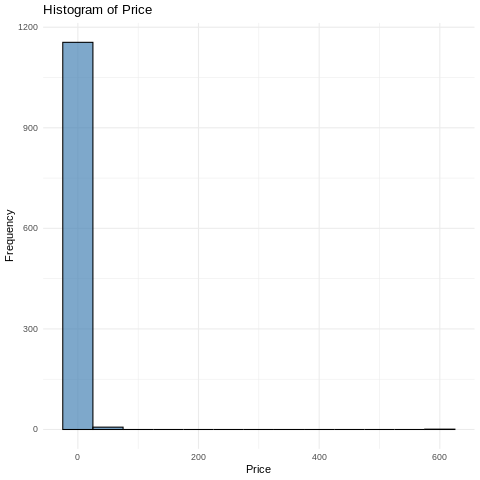

In [20]:
%%R
# Histogram of the 'price' variable
ggplot(df, aes(x = price)) +
geom_histogram(binwidth = 50, fill = "steelblue", color = "black", alpha = 0.7) +
labs(title = "Histogram of Price", x = "Price", y = "Frequency") +
theme_minimal()

The process is similar to create a scatter plot. Instead of `geom_histogram` you can specify a `geom_point` and include a `y` variable to the `aes()` argument.For example, to create a scatter of `price` and `value` you could write:

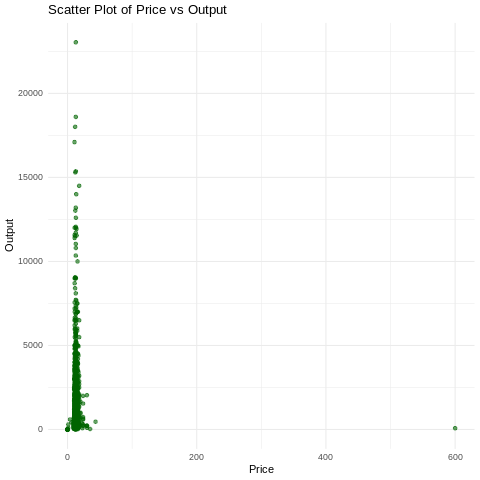

In [21]:
%%R
# Scatter Plot of the 'price' variable
ggplot(df, aes(x = price, y = output)) +
geom_point(color = "darkgreen", alpha = 0.6) +
labs(title = "Scatter Plot of Price vs Output", x = "Price", y = "Output") +
theme_minimal()

# **Q3: Create scatter plots to explore the relationship between output and each of the following input variables: `plot_area`, `lab_q`,` irr_q`, and `pest_v`. Generate a separate scatter plot for each of these input-output pairs. Based on these plots, what can you infer about the relationships between output and these inputs?**

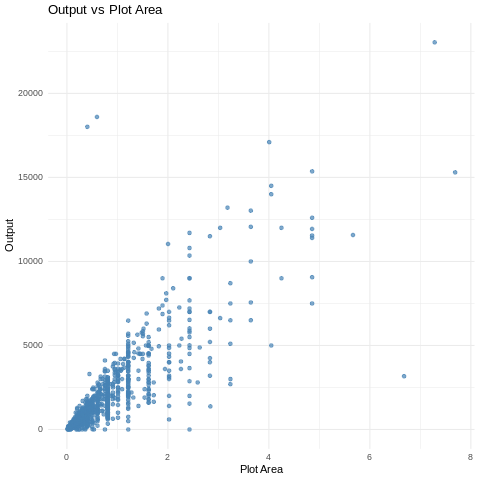

In [22]:
%%R
#------------------------- Your Code Here------------------------------------#
#plot area vs output
p1 <- ggplot(df, aes(x = plot_area, y = output)) +
  geom_point(color = "steelblue", alpha = 0.7) +
  labs(title = "Output vs Plot Area",
       x = "Plot Area",
       y = "Output") +
  theme_minimal()
 print(p1)

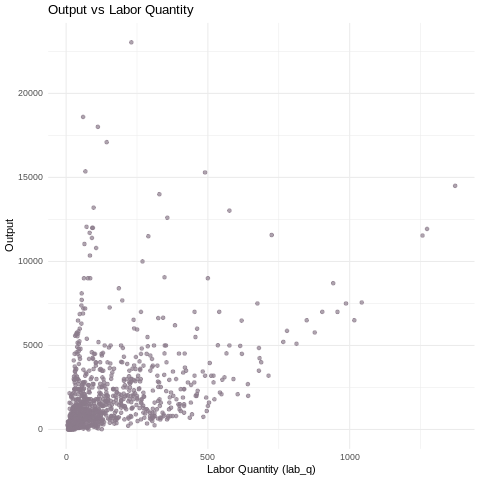

In [23]:
%%R
#labor quality vs output
p2 <- ggplot(df, aes(x = lab_q, y = output)) +
  geom_point(color = "thistle4", alpha = 0.7) +
  labs(title = "Output vs Labor Quantity",
       x = "Labor Quantity (lab_q)",
       y = "Output") +
  theme_minimal()
  print(p2)

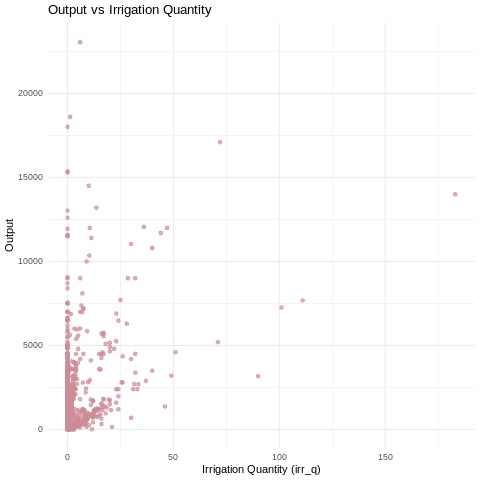

In [24]:
%%R
#irragation quality vs output
p3 <- ggplot(df, aes(x = irr_q, y = output)) +
  geom_point(color = "lightpink3", alpha = 0.7) +
  labs(title = "Output vs Irrigation Quantity",
       x = "Irrigation Quantity (irr_q)",
       y = "Output") +
  theme_minimal()
  print (p3)

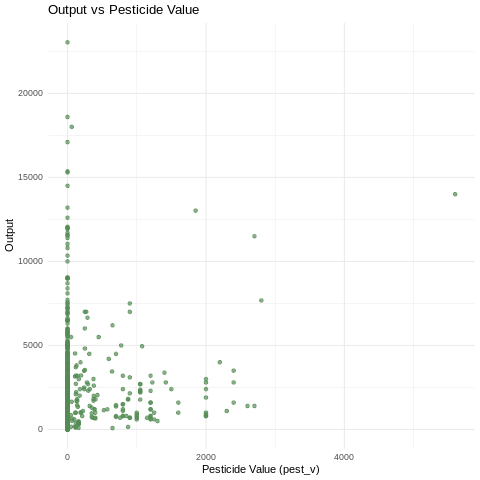

In [25]:

%%R
#pestide vs output
p4 <- ggplot(df, aes(x = pest_v, y = output)) +
  geom_point(color = "palegreen4", alpha = 0.7) +
  labs(title = "Output vs Pesticide Value",
       x = "Pesticide Value (pest_v)",
       y = "Output") +
  theme_minimal()
  print (p4)

**I can infer that the outputs and inputs have a positive and fairly linear relationship**

# **Create and Transform Variables**

Creating variables in a data frame in `R `is easy. All you need to do is to assign some value to a variable name that does not exist in the data frame. For example, to create a variable called `var1` in data frame `df` and assign the value of 1 to all observations, you could right:

In [26]:
%%R
# Create `var1` variable in df
df$var1 <- 1
# Check if var1 was addes
head(df)

# A tibble: 6 × 31
  country   vil_id  rain average    dev   pop  dist nomkt vdsa_hh_id tot_acre
  <dbl+lbl>  <dbl> <dbl>   <dbl>  <dbl> <dbl> <dbl> <dbl>      <dbl>    <dbl>
1 1 [India]    119   NA      NA  NA      3600     5     4     119035    1.22 
2 1 [India]    119  496.    577.  0.859  3600     5     4     119034    0.870
3 1 [India]    119  471.    577.  0.815  3600     5     4     119034    1.15 
4 1 [India]    120  471.    577.  0.815  4494    15     4     120048    1.80 
5 1 [India]    119  496.    577.  0.859  3600     5     4     119034    0.870
6 1 [India]    137   NA      NA  NA       880    13     2     137032    5    
# ℹ 21 more variables: genderH <dbl>, ageH <dbl>, noadultM <dbl>,
#   noadultF <dbl>, nokids <dbl>, sizehh <dbl>, farm_cat <chr>, aindex <dbl>,
#   lindex <dbl>, prcl_id <dbl>, sur_yr <dbl>, plot_area <dbl>, output <dbl>,
#   price <dbl>, value <dbl>, lab_q <dbl>, fert_q <dbl>, irr_q <dbl>,
#   mech_v <dbl>, pest_v <dbl>, var1 <dbl>


# **Using IHS Transformation for Zero Values**

In production economics, researchers often use logarithmic transformations of data to simplify relationships between variables and facilitate the estimation of production functions like [Cobb-Douglas](https://en.wikipedia.org/wiki/Cobb%E2%80%93Douglas_production_function) or Translog. The *log transformation* is particularly useful because it allows us to interpret the coefficients from regressions as [elasticities](https://en.wikipedia.org/wiki/Elasticity_(economics), providing insights into how input changes affect output.

However, log transformations run into a problem when the data contains zero values. Mathematically, the logarithm of zero $(log(0))$ is undefined, so we cannot directly apply the log function to variables that include zeros, which is common in agricultural production data (e.g., zero pesticide use on certain plots).

To address this issue, we can use an alternative transformation known as the **Inverse Hyperbolic Sine (IHS)** Transformation. The IHS transformation provides a way to handle zero values without arbitrarily adding small constants to the data. Its formula is:

$$log(x) = log(x+\sqrt{x^2+1})$$

  **Handles Zeros:** Unlike the log transformation, the IHS can handle zeros directly (solves the problem of $log(0)$), making it ideal for datasets where some input quantities (like pesticide use) may be zero.

  **Approximation of Logarithmic Scale:** For large values of x, the IHS transformation behaves similarly to the natural logarithm, preserving the interpretability of elasticities in economic models.

  **Avoids Arbitrary Additions:** Other methods involve adding a small constant to avoid taking the log of zero (e.g., log(x + 1)). This can introduce bias or arbitrary scaling, which the IHS avoids.

In our VDSA data, we often work with output and input variables such as *labor*, *fertilizer,* *irrigation*, and *pesticide*. To make comparisons across plots with different sizes, we typically consider these inputs on a per-hectare basis. To transform these variables using the IHS, we divide by the plot area and then apply the `asinh()` function in `R`.

For example, to create a variable called `lny` with the log of output divided by `plot_area`, we can run:

In [27]:
%%R
# Calculate the output per hectare by dividing 'output' by 'plot_area'
# Apply the inverse hyperbolic sine (asinh) transformation to the result
# Assign the transformed values to a new column 'lny' in the data frame 'df'
df$lny <- asinh(df$output / df$plot_area)

# Check if the new var `lny` was added to df
head(df)

# A tibble: 6 × 32
  country   vil_id  rain average    dev   pop  dist nomkt vdsa_hh_id tot_acre
  <dbl+lbl>  <dbl> <dbl>   <dbl>  <dbl> <dbl> <dbl> <dbl>      <dbl>    <dbl>
1 1 [India]    119   NA      NA  NA      3600     5     4     119035    1.22 
2 1 [India]    119  496.    577.  0.859  3600     5     4     119034    0.870
3 1 [India]    119  471.    577.  0.815  3600     5     4     119034    1.15 
4 1 [India]    120  471.    577.  0.815  4494    15     4     120048    1.80 
5 1 [India]    119  496.    577.  0.859  3600     5     4     119034    0.870
6 1 [India]    137   NA      NA  NA       880    13     2     137032    5    
# ℹ 22 more variables: genderH <dbl>, ageH <dbl>, noadultM <dbl>,
#   noadultF <dbl>, nokids <dbl>, sizehh <dbl>, farm_cat <chr>, aindex <dbl>,
#   lindex <dbl>, prcl_id <dbl>, sur_yr <dbl>, plot_area <dbl>, output <dbl>,
#   price <dbl>, value <dbl>, lab_q <dbl>, fert_q <dbl>, irr_q <dbl>,
#   mech_v <dbl>, pest_v <dbl>, var1 <dbl>, lny <dbl>


# **Q4:  Now, create similar variables for all inputs and call them `lnl`, `lnf`, `lni`, `lnm`, and `lnp`.**

In [28]:
%%R
#------------------------- Your Code Here------------------------------------#
df$lnl <- asinh(df$lab_q /df$plot_area)
df$lnf <- asinh(df$fert_q /df$plot_area)
df$lni <- asinh(df$irr_q /df$plot_area)
df$lnm <- asinh(df$mech_v /df$plot_area)
df$lnp <- asinh(df$pest_v /df$plot_area)

head(df)

# A tibble: 6 × 37
  country   vil_id  rain average    dev   pop  dist nomkt vdsa_hh_id tot_acre
  <dbl+lbl>  <dbl> <dbl>   <dbl>  <dbl> <dbl> <dbl> <dbl>      <dbl>    <dbl>
1 1 [India]    119   NA      NA  NA      3600     5     4     119035    1.22 
2 1 [India]    119  496.    577.  0.859  3600     5     4     119034    0.870
3 1 [India]    119  471.    577.  0.815  3600     5     4     119034    1.15 
4 1 [India]    120  471.    577.  0.815  4494    15     4     120048    1.80 
5 1 [India]    119  496.    577.  0.859  3600     5     4     119034    0.870
6 1 [India]    137   NA      NA  NA       880    13     2     137032    5    
# ℹ 27 more variables: genderH <dbl>, ageH <dbl>, noadultM <dbl>,
#   noadultF <dbl>, nokids <dbl>, sizehh <dbl>, farm_cat <chr>, aindex <dbl>,
#   lindex <dbl>, prcl_id <dbl>, sur_yr <dbl>, plot_area <dbl>, output <dbl>,
#   price <dbl>, value <dbl>, lab_q <dbl>, fert_q <dbl>, irr_q <dbl>,
#   mech_v <dbl>, pest_v <dbl>, var1 <dbl>, lny <dbl>, lnl <dbl>,

Assign labels to the newly created variables, including their units of measurement (e.g., “kg/ha” for fertilizer). Use the provided command lines to add these labels and append them to the original dataset.

In [29]:
%%R
# Define a vector containing the names of new variables
new.vars <- c("var1", "lny", "lnl", "lnf", "lni", "lnm", "lnp")

# Create a matrix that combines the new variable names with their corresponding labels
# cbind() combines the 'new.vars' vector with a vector of descriptive labels for each variable
new.labels <- cbind(new.vars, c(
                "variable with ones",             # Label for 'var1'
                "log of output per area (Rs/ha)", # Label for 'lny'
                "log of labor per area (Hr/ha)",  # Label for 'lnl'
                "log of fertilizer per area (kg/ha)", # Label for 'lnf'
                "log of irrigation per area (Lt/ha)", # Label for 'lni'
                "log of mechanistic input per area (Rs/ha)", # Label for 'lnm'
                "log of pesticide per area (Rs/ha)"  # Label for 'lnp'
))

# Set column names for the 'new.labels' matrix to describe what each column represents
colnames(new.labels) <- c("variable", "label")
# View  'new.labels' matrix
print(new.labels)

     variable label                                      
[1,] "var1"   "variable with ones"                       
[2,] "lny"    "log of output per area (Rs/ha)"           
[3,] "lnl"    "log of labor per area (Hr/ha)"            
[4,] "lnf"    "log of fertilizer per area (kg/ha)"       
[5,] "lni"    "log of irrigation per area (Lt/ha)"       
[6,] "lnm"    "log of mechanistic input per area (Rs/ha)"
[7,] "lnp"    "log of pesticide per area (Rs/ha)"        


# **Regression Analysis**

Finally, we can now run regressions in `R`. Basic OLS Regressions in `R` are run in the following form: `lm(indep_var ~ dep_var1 + … + dep_varN, data = data_frame_name)`

Where the first set of arguments are the regression formula and the second indicates the data frame to be used. To visualize a detailed regression output table, you can assign the regression to an object and call the `summary()` of it:

`summary(lm(indep_var ~ dep_var1 + … , data = df))`


# **Q5: Run a simple regression with log labor, fertilizer, irrigation, mechanization, and pesticide as independent variables and log yield as the dependent variable. How do you interpret the point estimates on each variable?**

In [30]:
%%R
#------------------------- Your Code Here------------------------------------#

regression <- lm(lny ~ lnl + lnf + lni + lnm + lnp, data = df)

# View detailed results
summary(regression)


Call:
lm(formula = lny ~ lnl + lnf + lni + lnm + lnp, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8418 -0.1620  0.0944  0.3938  2.9018 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.82518    0.35704  16.315  < 2e-16 ***
lnl         -0.02276    0.03730  -0.610  0.54193    
lnf          0.11408    0.02858   3.991 6.98e-05 ***
lni          0.03085    0.01804   1.711  0.08743 .  
lnm          0.21218    0.03274   6.480 1.35e-10 ***
lnp          0.03086    0.01185   2.604  0.00933 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9779 on 1157 degrees of freedom
Multiple R-squared:  0.07167,	Adjusted R-squared:  0.06766 
F-statistic: 17.86 on 5 and 1157 DF,  p-value: < 2.2e-16



**Labor**: The coefficient for labor is slightly negative, suggesting that higher labor use is associated with a small decrease in output, but this relationship is not statistically significant (p > 0.05).

**Fertilizer, irrigation, mechanization, and pesticide**: All have positive coefficients, indicating that increases in these inputs are associated with higher output. The effects of fertilizer, mechanization, and pesticide are statistically significant (p < 0.05), while irrigation shows a smaller, marginally significant positive effect (p ≈ 0.09). Mechanization also has the largest estimated impact


Before we move on, let’s create a binary indicator for irrigation use called `irr` that equals **1** if the parcel under observation had irrigation greater than zero and equals zero if the parcel had no irrigation.

In [31]:
%%R
# Create binary indicator ffor irrigation called `irr`
df$irr <- ifelse(df$irr_q > 0, 1, 0)
# Check if the new var was added by displaying the first few rows of the df
head(df)

# A tibble: 6 × 38
  country   vil_id  rain average    dev   pop  dist nomkt vdsa_hh_id tot_acre
  <dbl+lbl>  <dbl> <dbl>   <dbl>  <dbl> <dbl> <dbl> <dbl>      <dbl>    <dbl>
1 1 [India]    119   NA      NA  NA      3600     5     4     119035    1.22 
2 1 [India]    119  496.    577.  0.859  3600     5     4     119034    0.870
3 1 [India]    119  471.    577.  0.815  3600     5     4     119034    1.15 
4 1 [India]    120  471.    577.  0.815  4494    15     4     120048    1.80 
5 1 [India]    119  496.    577.  0.859  3600     5     4     119034    0.870
6 1 [India]    137   NA      NA  NA       880    13     2     137032    5    
# ℹ 28 more variables: genderH <dbl>, ageH <dbl>, noadultM <dbl>,
#   noadultF <dbl>, nokids <dbl>, sizehh <dbl>, farm_cat <chr>, aindex <dbl>,
#   lindex <dbl>, prcl_id <dbl>, sur_yr <dbl>, plot_area <dbl>, output <dbl>,
#   price <dbl>, value <dbl>, lab_q <dbl>, fert_q <dbl>, irr_q <dbl>,
#   mech_v <dbl>, pest_v <dbl>, var1 <dbl>, lny <dbl>, lnl <dbl>,

This will be our “treatment” variable. Let’s also create log transformed variables of `aindex`, `lindex`, `tot_acre`, and `dist` using the Inverse Hyperbolic Sine (IHS) `asinh()`. Call them `lnaindex`, `lnlindex`, `lntot_acre`, and `lndist`.

In [32]:
%%R
# Apply the inverse hyperbolic sine (asinh) transformation to 'aindex'
df$lnaindex <- asinh(df$aindex)

# Apply the inverse hyperbolic sine (asinh) transformation to 'lindex'
df$lnlindex <- asinh(df$lindex)

# Apply the inverse hyperbolic sine (asinh) transformation to 'tot_acre'
df$lntot_acre <- asinh(df$tot_acre)

# Apply the inverse hyperbolic sine (asinh) transformation to 'dist'
df$lndist <- asinh(df$dist)

# Check if the new columns were added by displaying the first few rows of the data frame
head(df)

# A tibble: 6 × 42
  country   vil_id  rain average    dev   pop  dist nomkt vdsa_hh_id tot_acre
  <dbl+lbl>  <dbl> <dbl>   <dbl>  <dbl> <dbl> <dbl> <dbl>      <dbl>    <dbl>
1 1 [India]    119   NA      NA  NA      3600     5     4     119035    1.22 
2 1 [India]    119  496.    577.  0.859  3600     5     4     119034    0.870
3 1 [India]    119  471.    577.  0.815  3600     5     4     119034    1.15 
4 1 [India]    120  471.    577.  0.815  4494    15     4     120048    1.80 
5 1 [India]    119  496.    577.  0.859  3600     5     4     119034    0.870
6 1 [India]    137   NA      NA  NA       880    13     2     137032    5    
# ℹ 32 more variables: genderH <dbl>, ageH <dbl>, noadultM <dbl>,
#   noadultF <dbl>, nokids <dbl>, sizehh <dbl>, farm_cat <chr>, aindex <dbl>,
#   lindex <dbl>, prcl_id <dbl>, sur_yr <dbl>, plot_area <dbl>, output <dbl>,
#   price <dbl>, value <dbl>, lab_q <dbl>, fert_q <dbl>, irr_q <dbl>,
#   mech_v <dbl>, pest_v <dbl>, var1 <dbl>, lny <dbl>, lnl <dbl>,

# **Save the Processed Data**

To save this data frame as .csv file called `VDSA_Prod_Data_Ref.csv,` you can use the following command:





In [33]:
%%R
# Save the data frame as a CSV file
write.csv(df, "/content/VDSA_Prod_Data_Ref.csv", row.names = FALSE)


# **Note** : Make sure to navigate to the side pane and locate the content folder. Expand the folder and locate your file. Download this file and store it in your dedicated GEOG279 folder or any other folder of your choice.

# **The Challenge of Establishing a Causal Effect**

To provide a sense of the difficulty in establishing causal effects, we're going to look at our data in two different ways.
* First, we are going to compare the effect of a hypothetical irrigation intervention on those who received the irrigation treatment versus those who did not. This is our **Within/Without** comparison.
* Second, we are going to compare the effect of the irrigation treatment on households **Before** they received the treatment and **After** they received the treatment. This is our  **Before/After** comparison.

### **1. Within/Without Comparison**



Using the transformed data frame that you just saved, create a new data set that contains only data from `sur_yr=2011`. Call it `df_2011`:

In [34]:
%%R
# Create a new df named  `df_2011` that contains only data from sur_yr=2011.
df_2011 <- subset(df, df$sur_yr=="2011")
head(df_2011 )

# A tibble: 6 × 42
  country   vil_id  rain average   dev   pop  dist nomkt vdsa_hh_id tot_acre
  <dbl+lbl>  <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl> <dbl>      <dbl>    <dbl>
1 1 [India]    119  496.    577. 0.859  3600   5       4     119034    0.870
2 1 [India]    119  496.    577. 0.859  3600   5       4     119034    0.870
3 1 [India]    118  465.    501. 0.929  3000   4.5     4     118030    1.10 
4 1 [India]    118  465.    501. 0.929  3000   4.5     4     118030    1.10 
5 1 [India]    119  496.    577. 0.859  3600   5       4     119035    0.75 
6 1 [India]    119  496.    577. 0.859  3600   5       4     119034    0.870
# ℹ 32 more variables: genderH <dbl>, ageH <dbl>, noadultM <dbl>,
#   noadultF <dbl>, nokids <dbl>, sizehh <dbl>, farm_cat <chr>, aindex <dbl>,
#   lindex <dbl>, prcl_id <dbl>, sur_yr <dbl>, plot_area <dbl>, output <dbl>,
#   price <dbl>, value <dbl>, lab_q <dbl>, fert_q <dbl>, irr_q <dbl>,
#   mech_v <dbl>, pest_v <dbl>, var1 <dbl>, lny <dbl>, lnl <dbl>, lnf <db

# **Q6: Generate a table (using the `by()` function) that shows the yields for those with irrigation treatment and those without the irrigation treatment. What do you learn from the table about the impact of the irrigation treatment on the log of yields?**

In [35]:
%%R
#------------------------- Your Code Here------------------------------------#
df$irrig_treat <- ifelse(df$irr_q > 0, 1, 0)

by(df$lny, df$irrig_treat, summary)

df$irrig_treat: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   7.926   8.322   8.237   8.729  11.396 
------------------------------------------------------------ 
df$irrig_treat: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   8.351   8.611   8.418   8.793  11.043 


the average log yield is a little higher for the irrigation treatment (8.42) compared to the non-irrigated group (8.24), it looks like irrigation slightly increases yields overall.

# **Q7: Perform a `t.test()` to compare the mean yield between households that received irrigation treatment and those that did not (the control group). Based on the results, what can you conclude about the impact of irrigation on yield? Does this test estimate the intention-to-treat effect, the effect of treatment on the treated, or the average treatment effect? Explain your reasoning.**

In [36]:
%%R
#------------------------- Your Code Here------------------------------------#
t.test(lny ~ irrig_treat, data = df)


	Welch Two Sample t-test

data:  lny by irrig_treat
t = -2.8833, df = 832.89, p-value = 0.004037
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.30407089 -0.05775585
sample estimates:
mean in group 0 mean in group 1 
       8.237282        8.418196 



Based on the t-test (p = 0.004), irrigation had a significant positive impact on yield. The average log yield for households with irrigation (8.42) was higher than for those without (8.24), and because the p-value is so low, it’s very unlikely this difference happened by chance.
 This test is estimating the intention-to-treat effect because it’s compares the people who were assigned irrigation to those who weren’t. It doesn’t check if everyone actually used it or not, so it’s measuring the impact of being offered irrigation, not the effect on only the ones who used it.





# **Q8: Run a regression analysis using only the irrigation treatment variable (irr) as the predictor and the logarithm of crop yield (lny) as the outcome. What do the results indicate? Specifically, what is the marginal effect of irrigation on crop yield? Does this regression capture the true impact of the irrigation treatment? Why or why not?**

In [38]:
%%R
#------------------------- Your Code Here------------------------------------#
irr_regress <- lm(lny ~ irrig_treat, data = df)
summary(irr_regress)


Call:
lm(formula = lny ~ irrig_treat, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4182 -0.1372  0.1519  0.4376  3.1592 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.23728    0.03940 209.058  < 2e-16 ***
irrig_treat  0.18091    0.05968   3.032  0.00249 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.009 on 1161 degrees of freedom
Multiple R-squared:  0.007854,	Adjusted R-squared:  0.006999 
F-statistic:  9.19 on 1 and 1161 DF,  p-value: 0.002487



The resuls indicate that irrigation has a small but positive effect on crop yield, switching from no irrigation to irrigation increases the log of yield by about 0.18 units on average. The regression does not show true impact of irragation treatment beacuse it is not accounting for confounding factors and is therefore only showing correlation and not necessarily causation.

# **Q9: Now, include the following control variables in your regression model: `lnl`, `lnf`,  `lnm`, `lnp`, `ageH`, `genderH`, `sizehh`, `aindex`, `lindex`, `tot_acre`, and `dist`. Optionally, you can apply a log transformation to `aindex`, `lindex`, `tot_acre`, and `dist`, but it is not required. Use `lny` as the dependent variable. In future exercises, we will refer to this set of 10 variables as our “standard set of control variables.”**

In [49]:
%%R
#------------------------- Your Code Here------------------------------------#
regress_w_controls <- lm(
  lny ~ irrig_treat + lnl + lnf + lnm + lnp + ageH + genderH + sizehh +
        log1p(aindex) + log1p(lindex) + log1p(tot_acre) + log1p(dist),
  data = df,)
summary(regress_w_controls)


Call:
lm(formula = lny ~ irrig_treat + lnl + lnf + lnm + lnp + ageH + 
    genderH + sizehh + log1p(aindex) + log1p(lindex) + log1p(tot_acre) + 
    log1p(dist), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2116 -0.1690  0.0814  0.3419  2.8202 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.6766361  0.4929751  11.515  < 2e-16 ***
irrig_treat      0.1115542  0.0828614   1.346   0.1786    
lnl              0.0763765  0.0472024   1.618   0.1060    
lnf              0.1523991  0.0300944   5.064 5.05e-07 ***
lnm              0.1845713  0.0358631   5.147 3.31e-07 ***
lnp              0.0284489  0.0125382   2.269   0.0235 *  
ageH             0.0002937  0.0026488   0.111   0.9117    
genderH         -0.0754234  0.1949006  -0.387   0.6989    
sizehh           0.0041173  0.0086942   0.474   0.6359    
log1p(aindex)    0.0003235  0.0311573   0.010   0.9917    
log1p(lindex)    0.1051743  0.0528532   1.990   0.0469 *  
log1p(tot

In addition: Warning messages:
1: In log1p(aindex) : NaNs produced
2: In log1p(lindex) : NaNs produced


**------------------------Your Answer here----------------------------------------**

# **Q10: How do the regression results change after adding the control variables? What does the new point estimate indicate? Is the coefficient on `irr` now an unbiased estimate of the treatment effect, or could it represent something else? Explain your interpretation.**

After adding the control variables, the irrigation coefficient went from 0.18 to 0.11. The estimated effect of irrigation got smaller and is no longer statistically significant, which suggests that some of the earlier yield differences between irrigated and non-irrigated households were actually due to other factors, not irrigation alone. this new point estimate still shows a positive relationship, but it’s weaker and not significant once those confounding factors are accounted for. The coefficient on irrigation is less biased than before, but there could still be unobserved factors or selection bias influencing the correlation.

# **Before/After Comparison**

Return to the data frame used before the Within/Without comparison `(df)`. Using this data set create a new data set that contains only households that received the irrigation treatment. To do this, run the following set of commands:**

In [42]:
%%R
# drop observations from 2012
df_small <- subset(df, sur_yr != 2012)

# count observations per parcel
df_small$obs <- ave(df_small$var1, df_small$prcl_id, FUN=sum)

# identify treated parcels in 2011
df_small$tr_2011 <- ifelse(df_small$sur_yr == 2011 & df_small$irr == 1, 1, 0)

# assign 2011 treatement status to observations in both years
df_small$tr_2011 <- ave(df_small$tr_2011, df_small$prcl_id, FUN=sum)

# subset of observations treated in 2011
df_tr2011 <- subset(df_small, tr_2011 == 1)

# keep only variables observed in both years
df_tr2011 <- subset(df_tr2011, obs == 2)

# make sure observations are balanced
table(df_tr2011$irr)


  0   1 
108 108 


#  **Q11: Generate a table (using the summary command) that shows the average yields for households before they received the irrigation treatment and average yields after the irrigation treatment. What do you learn from the table about the impact of the irrigation treatment on yields?**

In [44]:
%%R
#------------------------- Your Code Here------------------------------------#
by(df_tr2011$lny, df_tr2011$irr, summary)

df_tr2011$irr: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   8.565   8.827   8.492   8.940   9.446 
------------------------------------------------------------ 
df_tr2011$irr: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   8.506   8.833   8.478   9.004  11.043 


From this table, the avearge (mean and median) log yields before anda after treatment are very similar. This might mean that on average irrigation did not lead to a large change in yield across households. However, the maxium and upper quartile yields are higher after irrigation. This might mean certain households benefited substantially from the treatment.

# **Q12: Run a `t.test` to compare the mean yield by households before and after the irrigation treatment. What does the test indicate? Is this estimate the intention to treat effect, the effect of treatment on the treated, or the average treatment effect? Explain.**

In [45]:
%%R
#------------------------- Your Code Here------------------------------------#
t.test(df_tr2011$lny[df_tr2011$irr == 0],
       df_tr2011$lny[df_tr2011$irr == 1],
       paired = TRUE)


	Paired t-test

data:  df_tr2011$lny[df_tr2011$irr == 0] and df_tr2011$lny[df_tr2011$irr == 1]
t = 0.071685, df = 107, p-value = 0.943
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.3713403  0.3992041
sample estimates:
mean difference 
     0.01393192 



Based on the p-value of 0.943 there was no statistically significant difference between mean yields before and after irrigation. This might suggest that on average irrigation did not lead to a measurable change in household yields before and after irrigation. This estimate is the effect of treatment on treated because the comparison is only investigated houses that were treated and does not compare to an untreated set of households.

# **Q13: Run a regression that includes only the irrigation treatment variable and the log of crop yield as the outcome. What is the result? What is the marginal effect of having irrigation on crop yield? Is this the impact of the irrigation treatment?**

In [46]:
%%R
#------------------------- Your Code Here------------------------------------#
regress_irr_crop <- lm(lny ~ irr, data = df)
summary(regress_irr_crop)


Call:
lm(formula = lny ~ irr, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4182 -0.1372  0.1519  0.4376  3.1592 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.23728    0.03940 209.058  < 2e-16 ***
irr          0.18091    0.05968   3.032  0.00249 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.009 on 1161 degrees of freedom
Multiple R-squared:  0.007854,	Adjusted R-squared:  0.006999 
F-statistic:  9.19 on 1 and 1161 DF,  p-value: 0.002487



The positive y-intercept and p-value of 0.00249 show that irrigated plots have higher yields than non irrigated ones and that the difference is statistically significant. The marginal effect of having irrigation on crop yield is 0.181 or a 18.1% higher yield than non-irrigated plots. The regression did not control for confounding factors so this again is a correlation and doesn't necessarily show causation.

# **Q14: Now add the standard set of control variables. How do our results change? What does the point estimate tell us? Is the coefficient on irr the unbiased effect of the treatment? What else could it be?**

In [47]:
%%R
#------------------------- Your Code Here------------------------------------#
regress_irr_crop_controls <- lm(lny ~ irr + ageH + genderH + sizehh +
                           log1p(aindex) + log1p(lindex) + log1p(tot_acre) +
                           log1p(dist) + farm_cat, data = df)
summary(regress_irr_crop_controls)


Call:
lm(formula = lny ~ irr + ageH + genderH + sizehh + log1p(aindex) + 
    log1p(lindex) + log1p(tot_acre) + log1p(dist) + farm_cat, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5598 -0.1842  0.1333  0.3818  3.0308 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.5784247  0.3309692  25.919  < 2e-16 ***
irr              0.0950673  0.0742969   1.280  0.20105    
ageH             0.0005203  0.0027498   0.189  0.84998    
genderH         -0.0731635  0.2056843  -0.356  0.72215    
sizehh           0.0034004  0.0090567   0.375  0.70741    
log1p(aindex)    0.0274783  0.0327302   0.840  0.40141    
log1p(lindex)    0.1126684  0.0551145   2.044  0.04124 *  
log1p(tot_acre) -0.0292252  0.0719263  -0.406  0.68461    
log1p(dist)     -0.1208159  0.0417737  -2.892  0.00393 ** 
farm_catLB       0.5293684  0.4381879   1.208  0.22735    
farm_catMD       0.1675724  0.0964976   1.737  0.08283 .  
farm_catSM       0.1292321  0.

In addition: Warning messages:
1: In log1p(aindex) : NaNs produced
2: In log1p(lindex) : NaNs produced


The p-value for irrigation changes from 0.0025 to 0.201 making it no longer statistically significant. This can suggest that part of the irrigation effect in the first model was actually in part due to confounding factors in irrigated and non-irrigated households. The coefficient is not necessarily unbiased because the irrigation might not be randomly assigned or there could be unobservable facotors at play.

# **Research Question**

# 	**Q1: What is the central question of your research? Why is this question important in your field of study?**

The central question of my research is: How do extreme weather events, specifically the rapid transition from prolonged drought to extreme rainfall (“climate whiplash”), affect the abundance of tick populations and the dynamics of tick-borne pathogens across California’s climate gradient?

This question is important to my field because it bridges environmental and human health by linking climate extremes to disease ecology. Understanding these dynamics can help fill key gaps in vector-borne disease modeling, improve predictive public health tools, and shift how we conceptualize climate change by focusing on increasing extremes and variability rather than gradual warming.

# **Q2: What is the main outcome you are interested in?  Define the variable that represents this outcome in your study.**

The main outcome of my study is tick abundance, defined as the density of Ixodes ticks actively questing in the environment during the spring and summer seasons. Tick abundance reflects how environmental conditions influence vector population size and potential disease transmission risk. In this study, abundance will be quantified as the number of ticks collected per standardized sampling effort (for example, the number of ticks per 100 meters of drag transect or per person-hour of sampling) at each field site across California’s climate gradient. Both nymphal and adult life stages will be recorded, with Ixodes pacificus nymphal abundance serving as the primary indicator due to its stronger link to human disease risk.


# **Q3: What is the treatment or intervention in your study? How do you expect it to impact the outcome of interest?**

The treatment in my study is climate whiplash, defined as the rapid transition from prolonged drought to extreme rainfall events. This variable captures the increasing climatic variability characteristic of California, where years of extreme drought have recently been followed by intense atmospheric river storms. I expect sites that experience strong climate whiplash to show a rebound in tick abundance because heavy rainfall following drought increases vegetation growth and soil moisture, which in turn create cooler, more humid microclimates that enhance tick survival and questing behavior. These improved microclimatic conditions also promote higher small-mammal host activity, further supporting tick population recovery and persistence across California’s climate gradient

# **Q4: Draw and Discuss a DAG**

1. Create a Directed Acyclic Graph (DAG) representing the relationship between your treatment and outcome. Make sure to include possible confounders and intermediate variables.
2.	Label the components of your DAG, including treatment, outcome, confounders, and any other relevant variables.
3.	Identify and discuss at least two potential confounders that might affect your ability to identify the causal effect of the treatment on the outcome.

You can find more details on creating DAGS in `R` [here](https://evalf20.classes.andrewheiss.com/example/dags/).
To get you started here is a  DAG example:


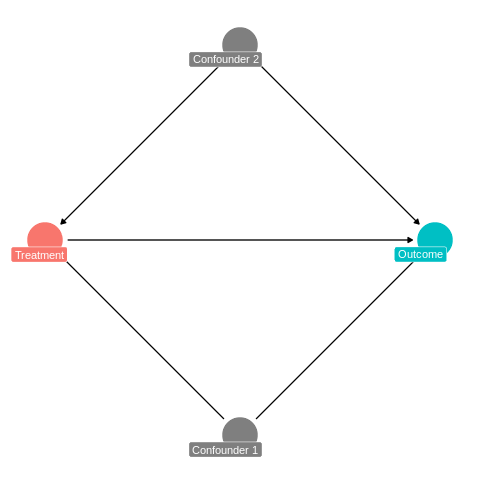

In [87]:
%%R
# Define the DAG
simple_dag_with_coords_and_labels <- dagify(
  y ~ x + a + b,  # Outcome depends on treatment and confounders
  x ~ a + b,      # Treatment depends on confounders
  exposure = "x",
  outcome = "y",
  labels = c(y = "Outcome", x = "Treatment",
             a = "Confounder 1", b = "Confounder 2"),
  coords = list(x = c(x = 1, a = 2, b = 2, y = 3),
                y = c(x = 2, a = 1, b = 3, y = 2))
)

# Plot the DAG
ggdag_status(simple_dag_with_coords_and_labels,
             use_labels = "label", text = FALSE) +
  guides(fill = FALSE, color = FALSE) +  # Disable the legend
  theme_dag()


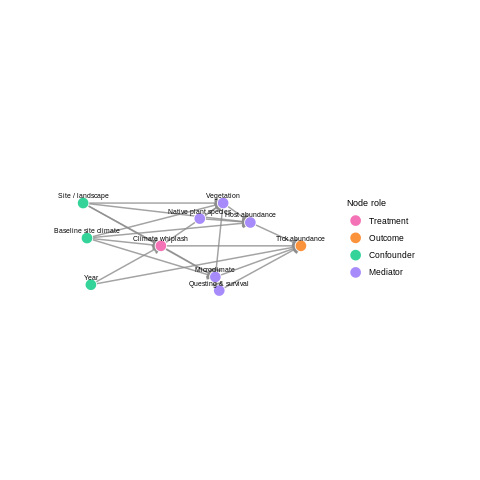

In [103]:
%%R

# colors + labels
role_cols <- c(
  "Treatment"  = "#F472B6",
  "Outcome"    = "#FB923C",
  "Confounder" = "#34D399",
  "Mediator"   = "#A78BFA"
)

lab_map <- c(
  Whiplash         = "Climate whiplash",
  TickAbundance    = "Tick abundance",
  BaselineClimate  = "Baseline site climate",
  Year             = "Year",
  Site             = "Site / landscape",
  NativePlants     = "Native plant species",
  Vegetation       = "Vegetation",
  Microclimate     = "Microclimate",
  HostAbundance    = "Host abundance",
  QuestingSurvival = "Questing & survival"
)

role_of <- function(nm){
  if (nm %in% "Whiplash") return("Treatment")
  if (nm %in% "TickAbundance") return("Outcome")
  if (nm %in% c("BaselineClimate","Year","Site")) return("Confounder")
  if (nm %in% c("Vegetation","Microclimate","HostAbundance","QuestingSurvival","NativePlants")) return("Mediator")
  return("Mediator")
}

#  DAG
whiplash_dag <- dagify(
  TickAbundance ~ Whiplash + Microclimate + HostAbundance + QuestingSurvival + Year,
  Vegetation       ~ Whiplash + BaselineClimate + NativePlants + Site,
  Microclimate     ~ Whiplash + BaselineClimate + Vegetation + Site,
  HostAbundance    ~ Vegetation + NativePlants + BaselineClimate + Site,
  QuestingSurvival ~ Microclimate,
  Whiplash ~ BaselineClimate + Year + Site,
  exposure = "Whiplash",
  outcome  = "TickAbundance",
  labels   = lab_map,
  # coordinates
  coords = list(
    x = c(
      Site=0, BaselineClimate=0.2, Year=0.4,
      Whiplash=4.0,
      NativePlants=6.0, Vegetation=7.2,
      Microclimate=6.8, QuestingSurvival=7.0,
      HostAbundance=8.6,
      TickAbundance=11.2
    ),
    y = c(
      Site=5.4, BaselineClimate=3.6, Year=1.2,
      Whiplash=3.2,
      NativePlants=4.6, Vegetation=5.4,
      Microclimate=1.6, QuestingSurvival=0.9,
      HostAbundance=4.4,
      TickAbundance=3.2
    )
  )
)

# build nodes/edges
crd <- coordinates(whiplash_dag)
nm  <- names(crd$x)
nodes <- data.frame(
  name  = nm,
  x     = as.numeric(crd$x[nm]),
  y     = as.numeric(crd$y[nm]),
  label = ifelse(nm %in% names(lab_map), lab_map[nm], nm),
  role  = vapply(nm, role_of, character(1)),
  stringsAsFactors = FALSE
)
nodes$role <- factor(nodes$role, levels = names(role_cols))

eraw <- as.data.frame(dagitty::edges(whiplash_dag)); colnames(eraw) <- c("from","to")
edges <- data.frame(
  from = eraw$from, to = eraw$to,
  x    = nodes$x[match(eraw$from, nodes$name)],
  y    = nodes$y[match(eraw$from, nodes$name)],
  xend = nodes$x[match(eraw$to,   nodes$name)],
  yend = nodes$y[match(eraw$to,   nodes$name)]
)

# plot
p <- ggplot() +
  geom_segment(
    data = edges,
    aes(x = x, y = y, xend = xend, yend = yend),
    color = "grey55", linewidth = 0.7, alpha = 0.8,
    arrow = arrow(length = grid::unit(3, "mm"), type = "closed")
  ) +
  geom_point(
    data = nodes,
    aes(x = x, y = y, fill = role),
    shape = 21, size = 5, color = "white", stroke = 0.6
  ) +
  geom_text(
    data = nodes,
    aes(x = x, y = y, label = label),
    vjust = -1.0, size = 2.4
  ) +
  scale_fill_manual(values = role_cols, name = "Node role") +
  coord_equal(
    xlim = c(-1.2, 12.8),
    ylim = c(-1, 8),
    expand = FALSE,
    clip = "off"
  ) +
  theme_minimal(base_size = 10) +
  theme(
    panel.grid = element_blank(),
    axis.text  = element_blank(),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    legend.position = "right",
    legend.title = element_text(size = 9),
    legend.text  = element_text(size = 8.5),
    plot.margin  = margin(20, 60, 20, 60)
  )

print(p)

#save jpeg
ggsave("whiplash_DAG.jpeg", plot = p, width = 10, height = 6, dpi = 300, units = "in")

# **How to submit assignment 1**

Please submit Assignment 1 on Gradescope. Check your email for the invitation to join the GEOG279 course on Gradescope.

<table style="border: 2px solid #4CAF50; background-color: #f0f9ff; padding: 10px; width: 100%; text-align: center;">
  <tr>
    <td><h1><strong>This concludes <span style="color: #4CAF50;">Assignment 1</span>.</strong></td></h1>
  </tr>
</table>